# Genereren van Pseudo-Random Getallen

In [1]:
import random

import pandas as pd
import scripts.RandomNumberGenerator as RNG
from scipy.stats import chisquare

Het genereren van een random seed gebaseerd op het aantal nanoseconden achter de komma:

In [2]:
seed = RNG.generate_seed()
seed

47492527961730960

## Random Number Generator Maken
Het genereren van Pseudo Random getallen door middel van een aangepaste versie van de midsquare: de endsquare

In [3]:
data = RNG.generator_endsquare(samples=10_000, seed=seed, show_seed=True)
print(data)

Seed: 47492527961730960, 17
[0.41658364 0.57299206 0.58219094 ... 0.91080108 0.36259129 0.61140629]


## Hypotheses opstellen

> H0: De RNG is niet willekeurig  
> H1: De RNG is willekeurig  
> $\alpha$: 0.05

## Random Number Generator Testen

### Test 1: visueel vergelijken met ingebouwde RNG Python
Het genereren van de distributie van de eigen Pseudo Random Number Generator. Tevens worden een zelfde hoeveelheid getallen doormiddel van de ingebouwde `random.uniform(0, 1)` functie getekend ter vergelijking.

Op het eerste oog lijkt de verdeling relatief uniform en zijn alle 10.000 waardes uniek. De verdeling lijkt erg op de verdeling van Python zelf, dit is veelbelovend. Echter is een visuele vergelijking niet genoeg om te bewijzen dat de verdeling uniform is.

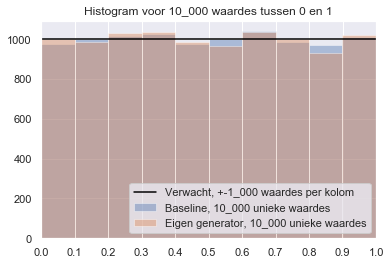

In [4]:
RNG.plot_distribution(samples=10_000, seed=seed)

## Test 2: Chi$^2$ toets
De Chi$^2$ toets wordt uitgevoerd op de zojuist gegenereerde data en op data gegenereerd met Python's eigen `random.unifom(0,1)`-functie. Te zien is dat beiden een P-waarde van 1 hebben. Van beiden sets valt _met aan zekerheid grenzende waarschijnlijkheid_ te zeggen dat ze uniform verdeeld zijn volgens de Chi$^2$ toets. Een P van 1 is immers meer dan 1 - $\alpha$. De grenswaarde is overschreden.

In [5]:
chisquare(data)

Power_divergenceResult(statistic=1665.5403032737931, pvalue=1.0)

In [6]:
baseline = []
for i in range(10_000):
    baseline.append(random.uniform(0,1))
chisquare(baseline)

Power_divergenceResult(statistic=1664.5769496111254, pvalue=1.0)

## Pi benaderen met Random Number Generator
> Bron: http://www.stealthcopter.com/blog/2009/09/python-calculating-pi-using-random-numbers/

Zoals bekend, is $\pi$ de ratio tussen de diameter en de omtrek van een cirkel en tevens de ratio tussen het oppervlakte en het kwadraad van de radius van een cirkel. Voor de benadering gaan we ervan uit dat de cirkel een radius van 1 heeft. Van de cirkel gaan we slechts één hoek meten, dit maakt het genereren makkelijken. De tacktiek om $\pi$ te berekenen zal als volgt zijn:

1. Willekeurig x-coördinaat genereren tussen 0 en 1
2. Willekeurig y-coördinaat genereren tussen 0 en 1
3. Bereken of coördinaat binnen de cirkel valt
4. Zo ja:  
    x += 1
5. Herhaal stappen 1 tot en met 4 voor $n$ aantal samples
6. Bereken Pi: $4 * x \div n$

De formule van stap 6 komt voort uit de formule voor de oppervlakte van een cirkel: $\pi\cdot r^2$. Aangezien de radius in dit geval 1 is, wordt de formule voor het oppervlak van een cirkel met radius 1: $\pi \cdot 1^2$ oftewel $\pi$. Aangezien wij slechts één hoek van de cirkel meten zal het resultaat met vier moeten worden vermenigvuldigd. Verder berekenen we de ratio tussen binnen of buiten de cirkel, oftewel: $\dfrac{\text{binnen}}{\text{buiten}}$. De uiteindelijke formule voor $\pi$ wordt vervolgens $4 \cdot{\dfrac{\text{binnen}}{\text{buiten}}}$

In [7]:
def benader_pi(n=10_000, seed=seed):
    x = RNG.generator_endsquare(samples=n, seed=seed)
    y = RNG.generator_endsquare(samples=n, seed=seed + 1)  # Seed moet net anders zijn, anders twee maal dezelfde waardes
    
    df = pd.DataFrame({"x":x, "y":y})
    df["Pythagoras"] = (df["x"] ** 2 + df["y"] ** 2) ** 0.5
    df["Pythagoras"] = df["Pythagoras"].astype(int)  # Afronden
    
    binnen = (df["Pythagoras"] == 0).sum()  # Alles afgerond naar 0 valt binnen de cirkel
    pi = 4 * binnen / n
    
    return pi

print(benader_pi())

3.1492
